In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize, WhitespaceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn import preprocessing
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv('../input/train.csv')
df_test=pd.read_csv('../input/test.csv')
df_subm=pd.read_csv('../input/sample_submission.csv')

In [4]:
df_train['reviews']=df_train['positives']+ " "+ df_train['negatives']

In [5]:
df_train.sample(5)

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall,reviews
7744,17585,startup_4,"Seattle, WA","Nov 26, 2016",Former Employee,Anonymous Employee,Financial Analyst Intern,"A lot to learn, good intern event, helpful mentor","High stress, indifferent big boss",NaN,1.0,2.0,4.0,NaN,NaN,0,3.0,"A lot to learn, good intern event, helpful men..."
1632,3684,startup_1,"Mountain View, CA","Sep 4, 2014",Former Employee,Software Engineering Intern,"Great people, work, and environment",The company is extremely transparent internall...,If you end up on a project you aren't all that...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0,The company is extremely transparent internall...
24146,53948,startup_6,"Redmond, WA","Feb 6, 2016",Current Employee,Senior Content Developer,"Great job, love it here","There's no more annual performance review, we'...",Work life balance getting harder and harder to...,NaN,2.0,1.0,4.0,5.0,4.0,0,4.0,"There's no more annual performance review, we'..."
12236,27537,startup_4,"Windsor, ON (Canada)","Jun 10, 2018",Current Employee,Any,Good company amazon,Standard company and good customer,Yeah gud company i like this work here,I work this company i like,5.0,5.0,5.0,5.0,5.0,0,5.0,Standard company and good customer Yeah gud co...
848,1976,startup_1,"Mountain View, CA","Aug 22, 2016",Current Employee,Research Intern,Great place to work,"Surrounded by smart, motivated, talented peopl...",Feel like a small fish in a big pond.,NaN,NaN,NaN,NaN,NaN,NaN,0,5.0,"Surrounded by smart, motivated, talented peopl..."


In [6]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty and less than 3 length tokens
    text = [t for t in text if len(t) >= 3]
    # pos tag text
    #pos_tags = pos_tag(text)
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with less than 3 letters
    text = [t for t in text if len(t) >= 3]
    # join all
    text = " ".join(text)
    return(text)

In [7]:
# # clean text data
df_train["Clean_reviews"] = df_train["reviews"].apply(lambda x: clean_text(x))
# df_test["Clean_reviews"] = df_test["Reviews"].apply(lambda x: clean_text(x))

In [8]:
def show_wordcloud(data, title = None):
    V_wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 7
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(V_wordcloud)
    plt.show()

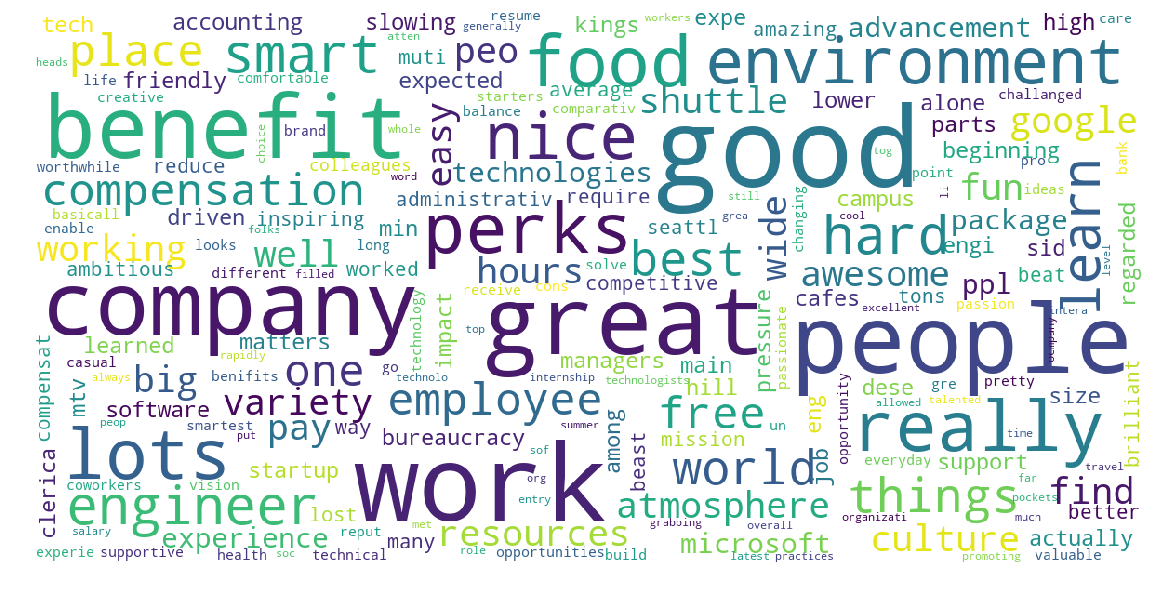

In [9]:
show_wordcloud(df_train['Clean_reviews'])

In [10]:
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# CVec = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
CVec = CountVectorizer(stop_words='english', min_df=3)

X=df_train['Clean_reviews']
df_train['score_1']=df_train['score_1'].fillna(df_train['score_1'].max())
Y=df_train['score_1']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=7)

In [11]:
#X_train.head()
#y_train

In [12]:
X_train_vect=CVec.fit_transform(X_train)
X_test_vect=CVec.transform(X_test)

In [13]:
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test = le.transform(y_test)

In [14]:
(y_test.shape)

(7584,)

In [15]:
X_train_vect.shape, X_test_vect.shape

((22752, 8792), (7584, 8792))

In [16]:
len(CVec.get_feature_names())

8792

In [17]:
model_XGB = XGBClassifier(random_state=5, n_jobs=-1)
model_XGB.fit(X_train_vect, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
pred_XGB = model_XGB.predict(X_test_vect)
print(pred_XGB.shape)

(7584,)


In [19]:

#print('XGB_Train_Accuracy: ', model_XGB.score(pred_XGB, y_test))
print('XGB_Test_Accuracy: ', accuracy_score(y_test, pred_XGB))
# print('XGB_F1_score: ', f1_score(y_test, pred_XGB, average='weighted'))

XGB_Test_Accuracy:  0.34981540084388185


In [20]:
 from sklearn.linear_model import LogisticRegression

In [21]:
 lf = LogisticRegression(random_state=0, solver='lbfgs',
...                          multi_class='multinomial').fit(X_train_vect, y_train)

In [22]:
pred=lf.predict(X_test_vect)

In [23]:
accuracy_score(y_test, pred)

0.3358386075949367